#Campus Recruitment Prediction With Machine Learning for MBA Students


 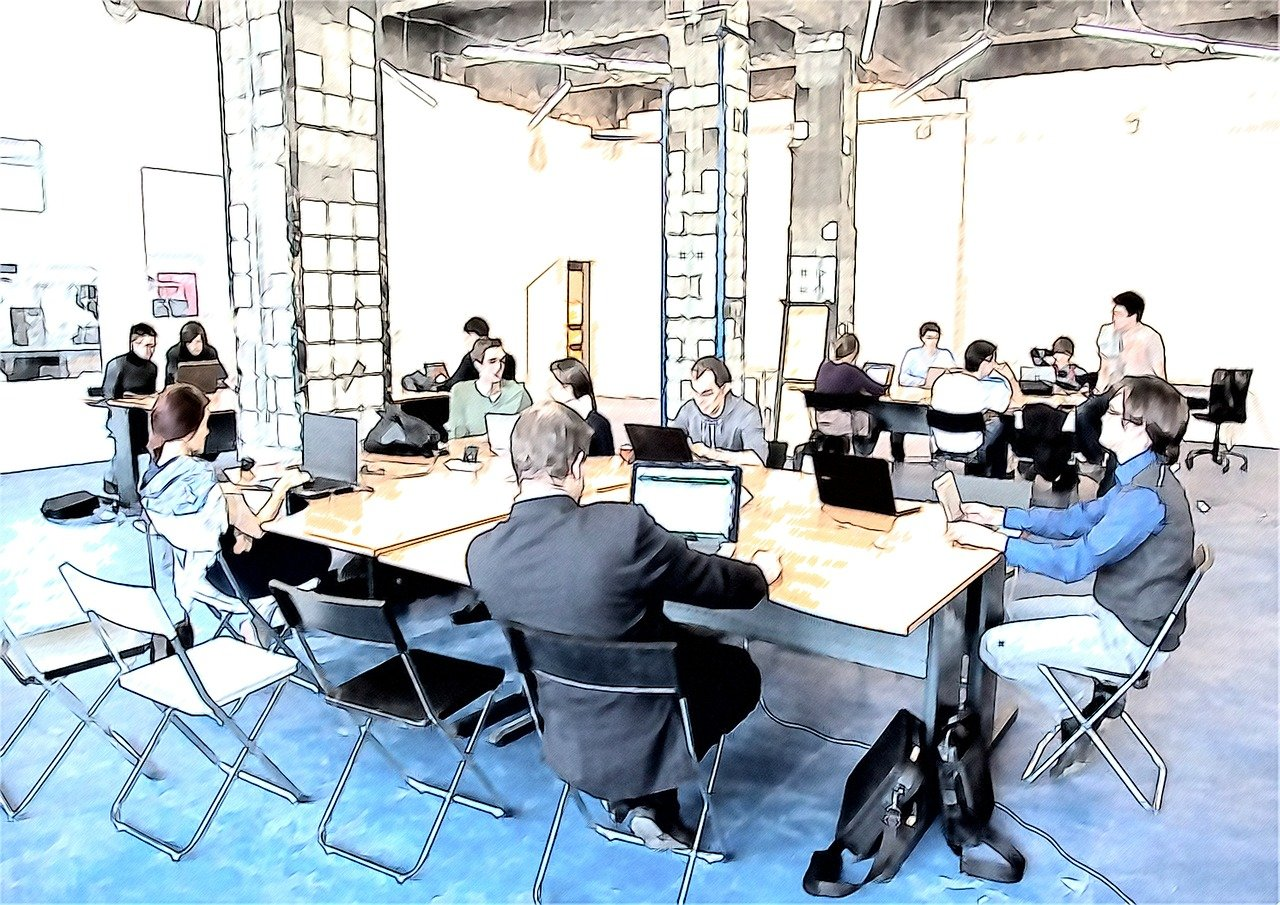

**Student Name:** Didulani P.K.S<br>
**Registration Number:** EG/2020/3894<br>

In this project we are going to utilize the **Campus Recruitment** Dataset from Kaggle which consisit of various features which might influence the Placement of Student in Jobs.

Data Link: https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement/data

There are alltogether 14 features and the target variable (Status). A description of the target dataset features have been provided below.

* sl_no:Serial Number
* gender: Gender- Male='M',Female='F'
* ssc_p: Secondary Education percentage- 10th Grade
* ssc_b: Board of Education- Central/ Others
* hsc_p: Higher Secondary Education percentage- 12th Grade
* hsc_b: Board of Education- Central/ Others
* hsc_s: Specialization in Higher Secondary Education
* degree_p: Degree Percentage
* degree_t: Under Graduation(Degree type)- Field of degree education
* workex: Work Experience
* etest_p: Employability test percentage (conducted by college)
* specialisation: Post Graduation(MBA)- Specialization
* mba_p: MBA percentage
* status: Status of placement- Placed/Not placed
* salary: Salary offered by corporate to candidates

So, in this task, we are starting with the Exploratory Data Analysis (EDA) and progress towards the data preprocessing and finally implementing machine learning models to predict student placements in corporations.

**Please take the following points into consideration while completing the assignment and during the submission**

1. It is recommended to use Google Colab or Jupyer notebook (hosted in anaconda framework) to complete this assignment.
2. Submit the downloaded Jupyter notebook (.ipynb) from the Colab or Jupyter notebook along with results on or before the deadline (Results including plots, tables/dataframes, printed values and text explanations should be visible along with your code. If you are fail to save the document in such a way no marks will be given for such sections). **Furthermore, assignments subitted after the deadline will not consider for grading**.
3. In adddition to that submit the generated .pdf file of the notebook after running all the code blocks (Hint: If colab shows distortions in the generated pdf try to generate the pdf with Jupyter Notebook in Anaconda; makesure that your comments are completely visible).
4. Results and explanations should be clearly visible in both documents.
5. You should submit a .zip file with .ipynb file and .pdf file of the notebook.
6. Rename the zipfile as **EE5253_Assignment_EG20YYXXXX** (YY = Registration Year, XXXX = Student Registration Number)


**Note: Each plot in this assigment needs to be formatted in proper way (i.e., plot titles, axis titles, etc. should be added accordingly)**

## Load the Necessary Libraries

In [49]:
# Load the necessary libraries here
# If you are not sure what to be impored at the moment please start proceding with the upcoming tasks and import the libraries later
# according to the requirements

# Hint: You may need matplotlib and seaborn libraries for data visualization
# Hint: Think about what the libraries need in order to load a .csv file and process it

# Your code goes here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


## Data Loading

In [50]:
# Add the dataset into the Colab runtime and load the dataset as a Pandas dataframe.
# If you are running jupyer notebook in your local anaconda virtual environment provide the correct path to
# load the data.

# Your code goes here
data= pd.read_csv("Placement_Data_Full_Class.csv")

# Print the first five rows of the loaded dataframe
# Your code goes here
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [51]:
# Since the sl_no feature just indicating the index of the each data point you may drop the column
# Your code goes here
data=data.drop('sl_no',axis=1)
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


## Exploratory Data Analysis (EDA)

In [52]:
# Identify the shape of the loaded dataframe

# Your code goes here
data.shape

(215, 14)

In [53]:
# Print a concise summary of the pandas dataframe

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

# Your code goes here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


**Q:** Based on the printed summary identify what are the categorical and numerical features of the dataset. Please note them down below. <br>
> **A:**
#### Numarial data
1. ssc_p
2. hsc_p
3. degree_p
4. etest_p
5. mba_p
6. salary

#### categorical data
1. gender 
2. ssc_b
3. hsc_b 
4. hsc_s
5. degree_t
6. workex 
7. specialisation
8. status



In [54]:
# Generate descriptive analytics for the numerical features in the dataset

# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

# Your code goes here
data.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


### Data Visualization



In the following section we are going to do some visualization in the dataset.

**Q:**In this case we are going to split the dataset into train and test sets and utilize only the train set for the visualizations. What should be the reason?<br>
> **A:**
We are going to split the dataset into train and test sets and utilize only the train set for the visualizations because we need to check the accuracy of the model. So we need to split the dataset into train and test sets. We can use the train set for the visualizations.



In [55]:
# Split the dataset into train and test sets
# Make sure to separate independent and dependent variables as well

# Your code goes here



x=data.drop('status',axis=1)
y=data['status']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)


In [56]:
# Print number of training data points
# Your code goes here
x_train.shape

(172, 13)

In [57]:
# Print number of testing data points
# Your code goes here
x_test.shape


(43, 13)

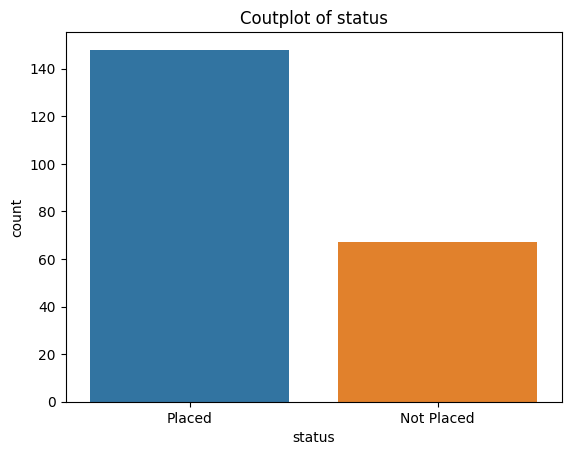

In [58]:
# Print the counts of status (the target variable) using seaborn countplot
# Hint: https://seaborn.pydata.org/generated/seaborn.countplot.html

# Your code goes here
sns.countplot(x='status',data=data)
plt.title('Coutplot of status')
plt.show()

**Q:** Can you recognize that the dataset is imbalnaced? Mention three problems of imbalnced dataset may cause during the machine learning model traning. <br>
> **A:** <br>
Yes, dataset is imbalanced

1. When we are getting the prediction the model most of the time predict the result as majority class(model is bias to the majority class)<br>
2. Model will perform poor with the minority class.<br>
3. Imbalanced datasets can lead to poor generalization to the minority class.<br>



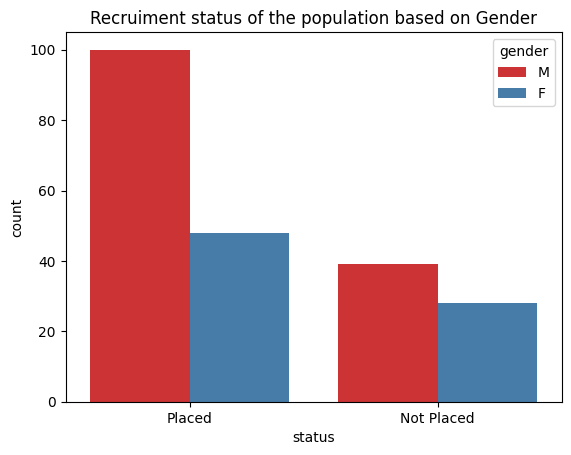

In [59]:
# Plot the recruiment status of the population based on Gender
# Hint: Set the hue parameter accordingly


# Your code goes here
sns.countplot(x='status',hue='gender',data=data,palette='Set1')
plt.title('Recruiment status of the population based on Gender')
plt.show()



**Q:** Explain the observation from the above table.
> **A:**

In here we can see that the number of male students is higher than the number of female students. Also, the number of male students is doubled when compared to the number of female students who have been placed in the job. Additionally, the number of not-selected male students is higher than the number of not-placed female students.



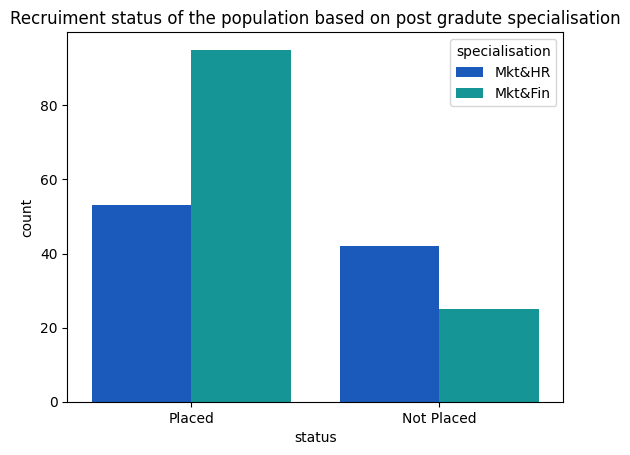

In [60]:
# Plot the recruiment status of the population based on the post gradute specialisation

# Your code goes here
sns.countplot(x='status',hue='specialisation',data=data,palette='winter')
plt.title('Recruiment status of the population based on post gradute specialisation')
plt.show()

**Q:** Inteprete the above results.
> **A:**
The number of Mkt&HR student who place the job is less than the number of Mkt&Fin student who place the job. 
The number of Mkt&HR student who not place the job is height than the number of Marketing student who not place the job.




c:\Users\DELL\.conda\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\.conda\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\.conda\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\.conda\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

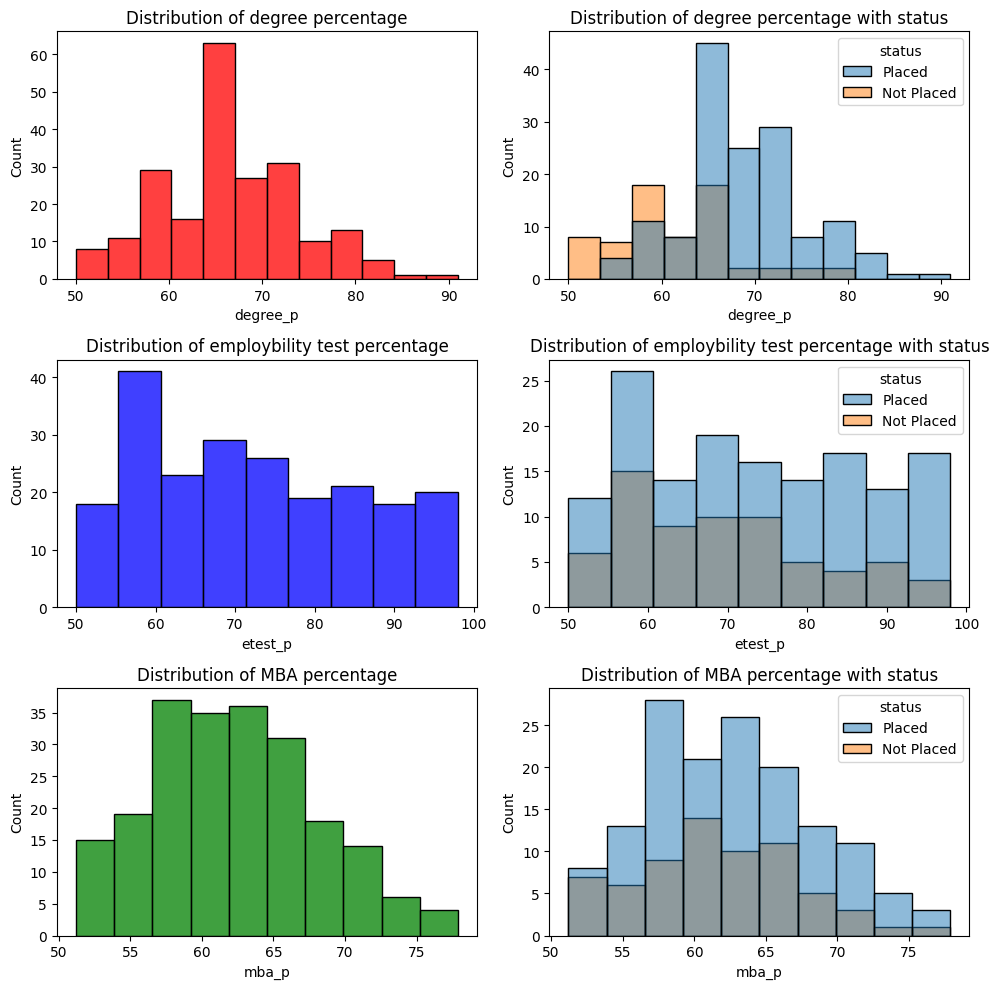

In [61]:
# Plot the distribution of degree percentage, employbility test percentage and, MBA percentage on three histograms in the same figure
# Hint: Use subplots (Add the subplots into one column of the figure)
# Hint: https://seaborn.pydata.org/generated/seaborn.histplot.html

# Your code goes here

plt.figure(figsize=(10,10))

plt.subplot(3,2,1)
sns.histplot(data=data,x='degree_p',color='red')
plt.title('Distribution of degree percentage')

plt.subplot(3,2,3)
sns.histplot(data=data,x='etest_p',color='blue')
plt.title('Distribution of employbility test percentage')

plt.subplot(3,2,5)
sns.histplot(data=data,x='mba_p',color='green')
plt.title('Distribution of MBA percentage')




# Add seperate column to the subplots and plot same figures based on the placement state
# Make sure to plot the all six plots in the same figure.

# Your code goes here
plt.subplot(3,2,2)
sns.histplot(data=data,x='degree_p',color='red',hue='status')
plt.title('Distribution of degree percentage with status')

plt.subplot(3,2,4)
sns.histplot(data=data,x='etest_p',color='blue',hue='status')
plt.title('Distribution of employbility test percentage with status')

plt.subplot(3,2,6)
sns.histplot(data=data,x='mba_p',color='green',hue='status')
plt.title('Distribution of MBA percentage with status')

plt.tight_layout()
plt.show()



**Q:** Summarize the visualizations in the above six plots.<br>
> **A:**


Distribution of the Degree percentage:
The majority of the students have a degree percentage between 65% and 75%.Therefore we can say that the degree percentage is normally distributed.

Distribution of Employability test percentage:
The majority of the students have an employability test percentage between 55% and 70%. Therefore we can say that the employability test percentage is right-skewed.

Distribution of the MBA percentage:
The majority of the students have an MBA percentage between 58% and 68%. Therefore we can say that the MBA percentage is normally distributed.

Distribution of degree percentage with status
The students who have a degree percentage more than 65% are placed in the job. The students who have a degree percentage lower than 65% are not placed in the job.

Distribution of employability test percentage with status
Here all are placed in the job. The employability test percentage is not a factor that affects the placement of the student in the job.

Distribution of MBA percentage with status
Here all are placed in the job. The MBA percentage is not a factor that affects the placement of the student in the job.


In [62]:
# Check for the null values in train set

# Your code goes here
x_train.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            49
dtype: int64

In [63]:
# Check for the null values in test set

# Your code goes here
x_test.isnull().sum()

gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
salary            18
dtype: int64

<Axes: >

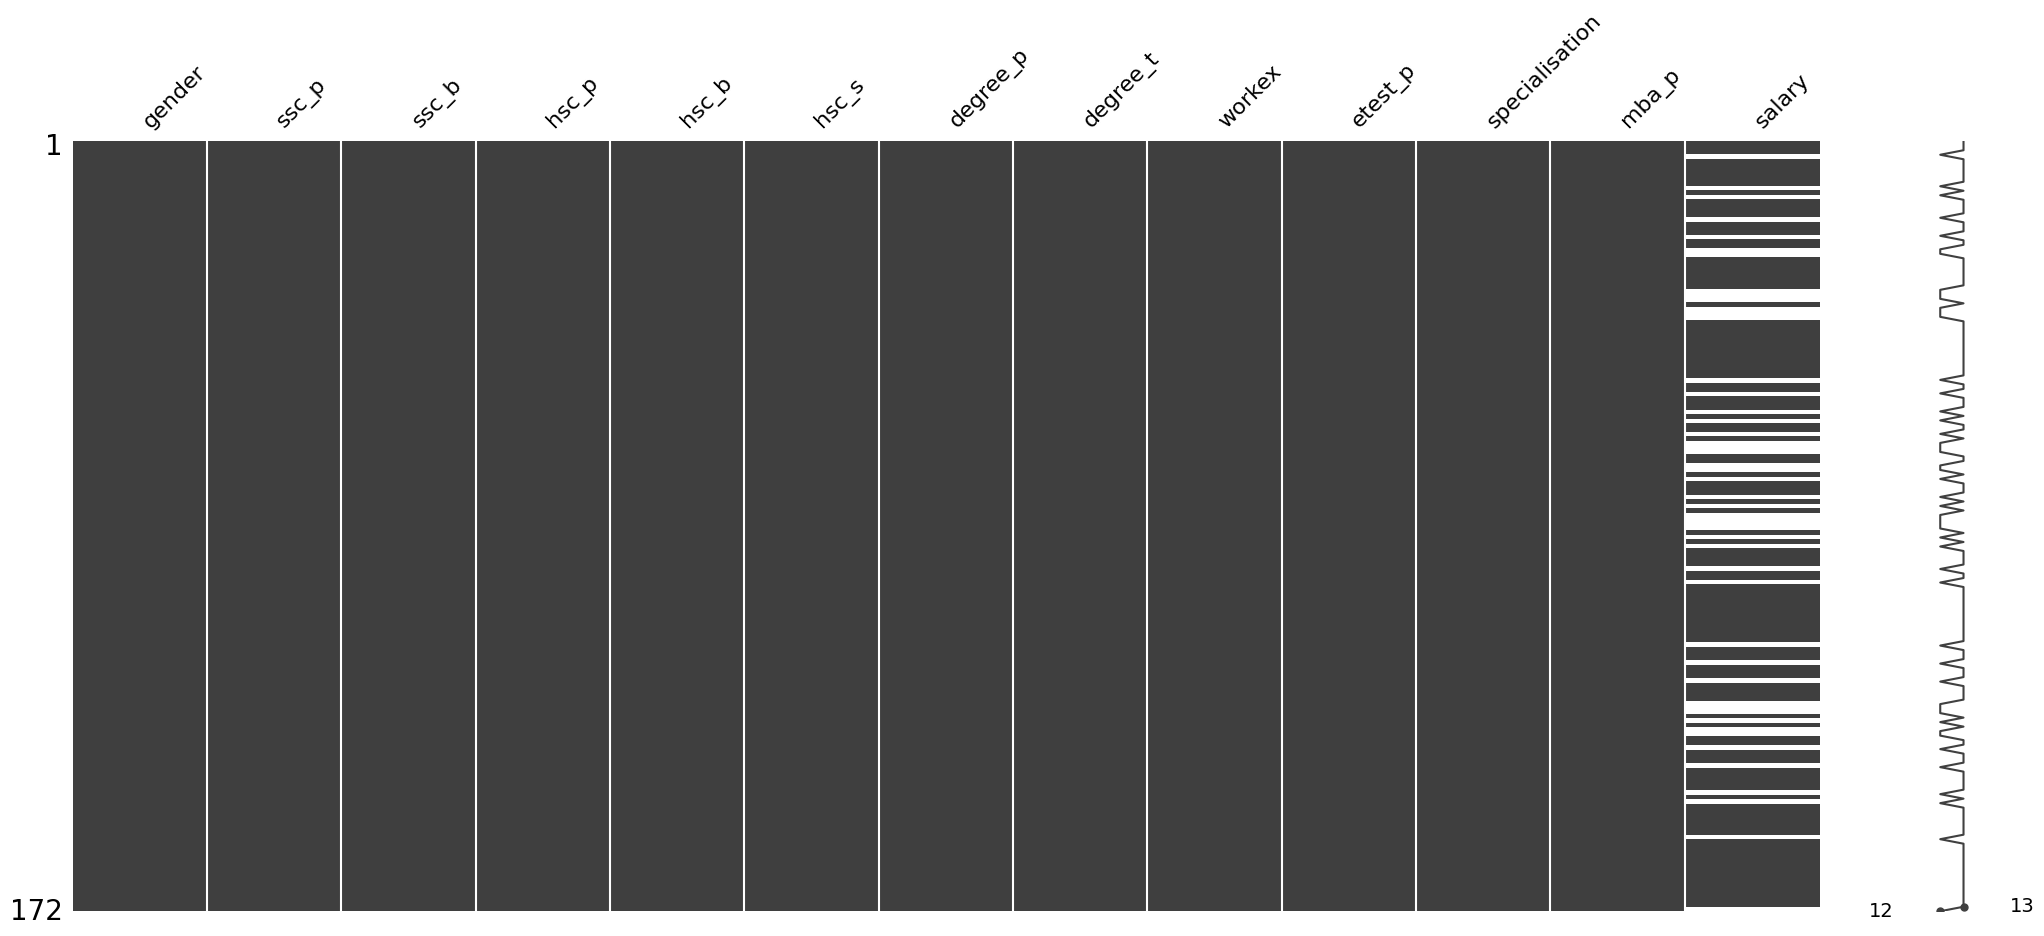

In [64]:
# Display the missing values in the train set using matrix plot
# Hint: https://towardsdatascience.com/using-the-missingno-python-library-to-identify-and-visualise-missing-data-prior-to-machine-learning-34c8c5b5f009

# Your code goes here
import missingno as msno
msno.matrix(x_train)


## Data Preprocessing

### Handle the Missing Data

**Q:**Given the task "Prediction of Placements of Campus Students (Target Variable: status - Status of placement- Placed/Not placed)" propose a method to handle the missing data in this problem and implement that accordingly. Defend your proposed method for handling the missing data (**Hint:** Observe the matrix plot generated above identify where these missing values are located).
> **A:**

Here we can fill the missing values by predicting the value base on the value that are presented. The method is interpolation. Here by using linear interpolation we can fill the missing values. The advantage of using linear interpolation is that it is simple and easy to implement. 

c:\Users\DELL\.conda\envs\condaenv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='salary', ylabel='Count'>

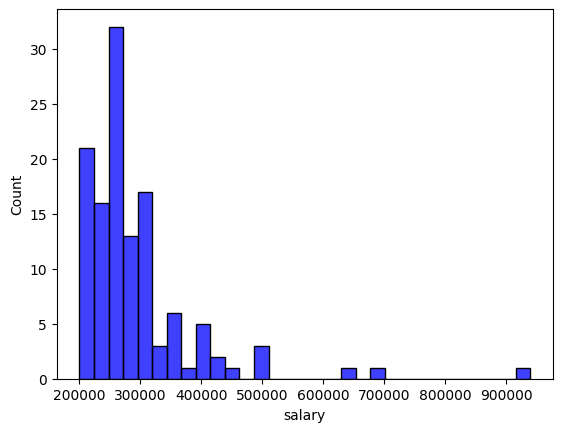

In [65]:
sns.histplot(data=x_train,x='salary',color='blue') 

In [66]:
# Handle the missing data

# Your code goes here
x_train['salary'].interpolate(method='linear', inplace=True)



<Axes: >

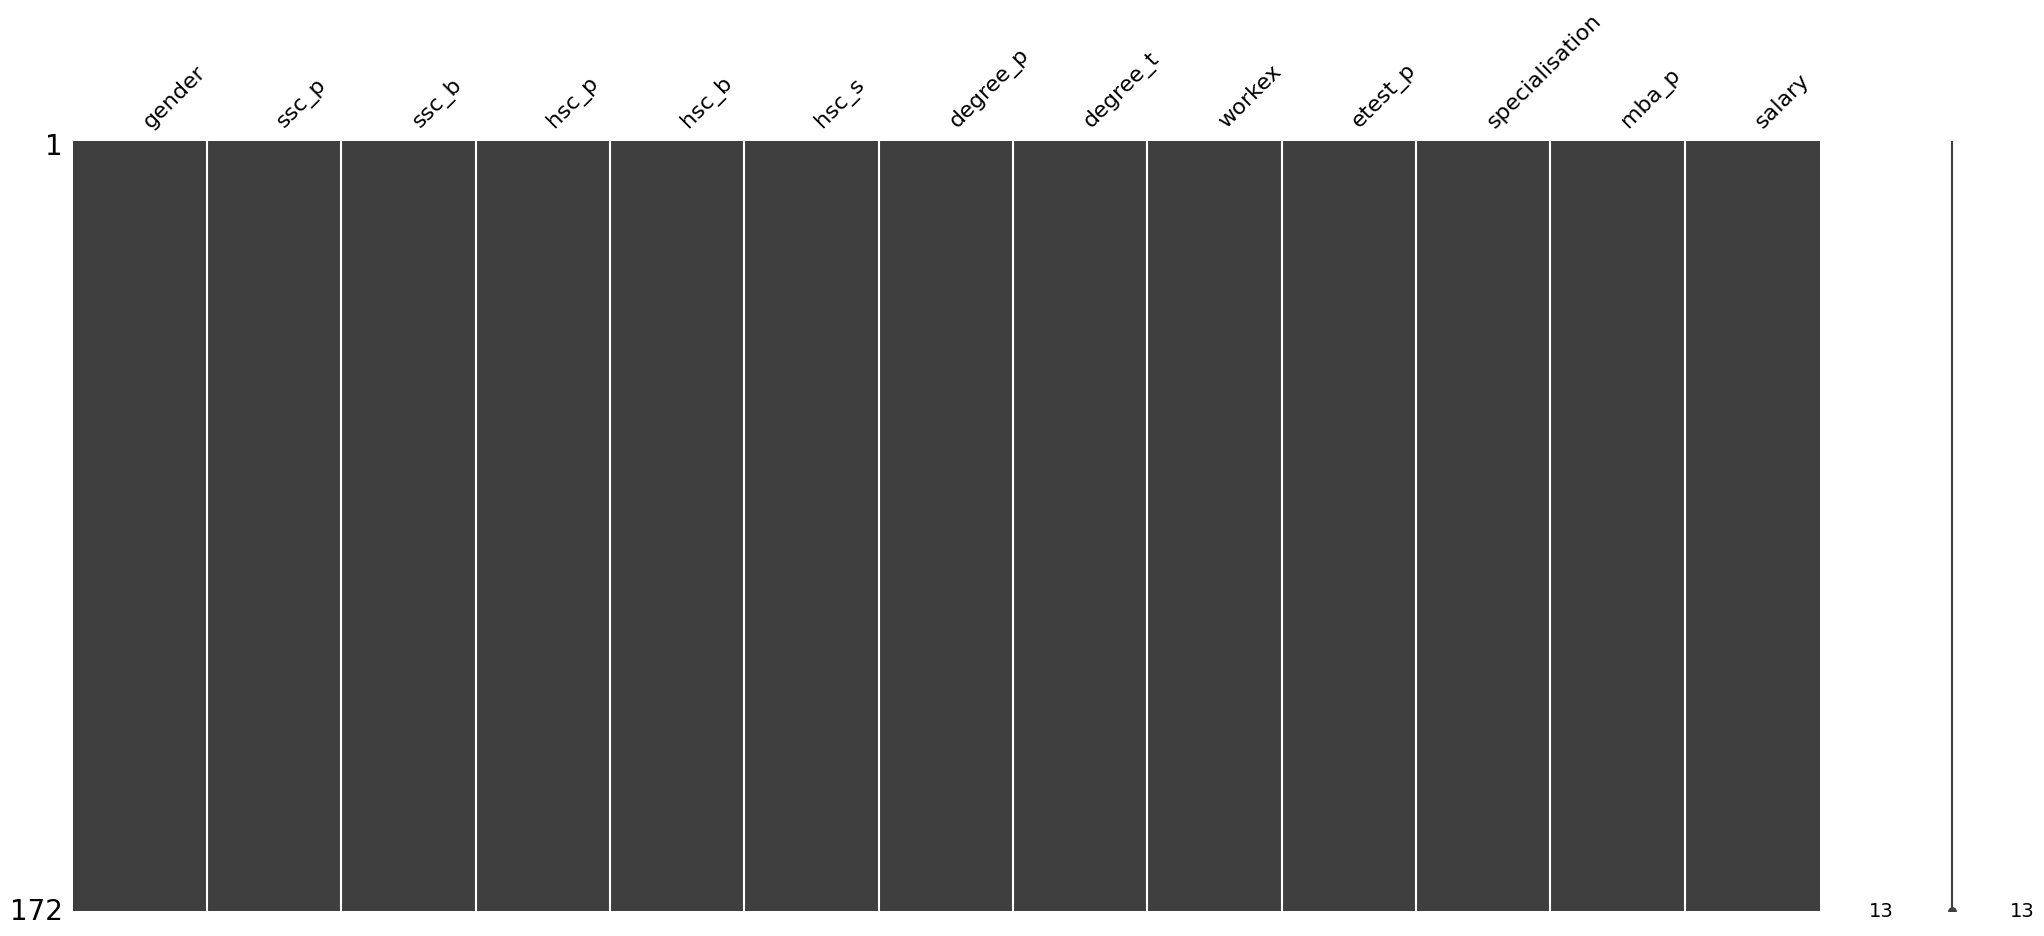

In [67]:
# Test the training dataset after processing the null values

# Your code goes here
msno.matrix(x_train)

In [68]:
# Process the null values in the test set

# Your code goes here
x_test['salary'].interpolate(method='linear', inplace=True)

<Axes: >

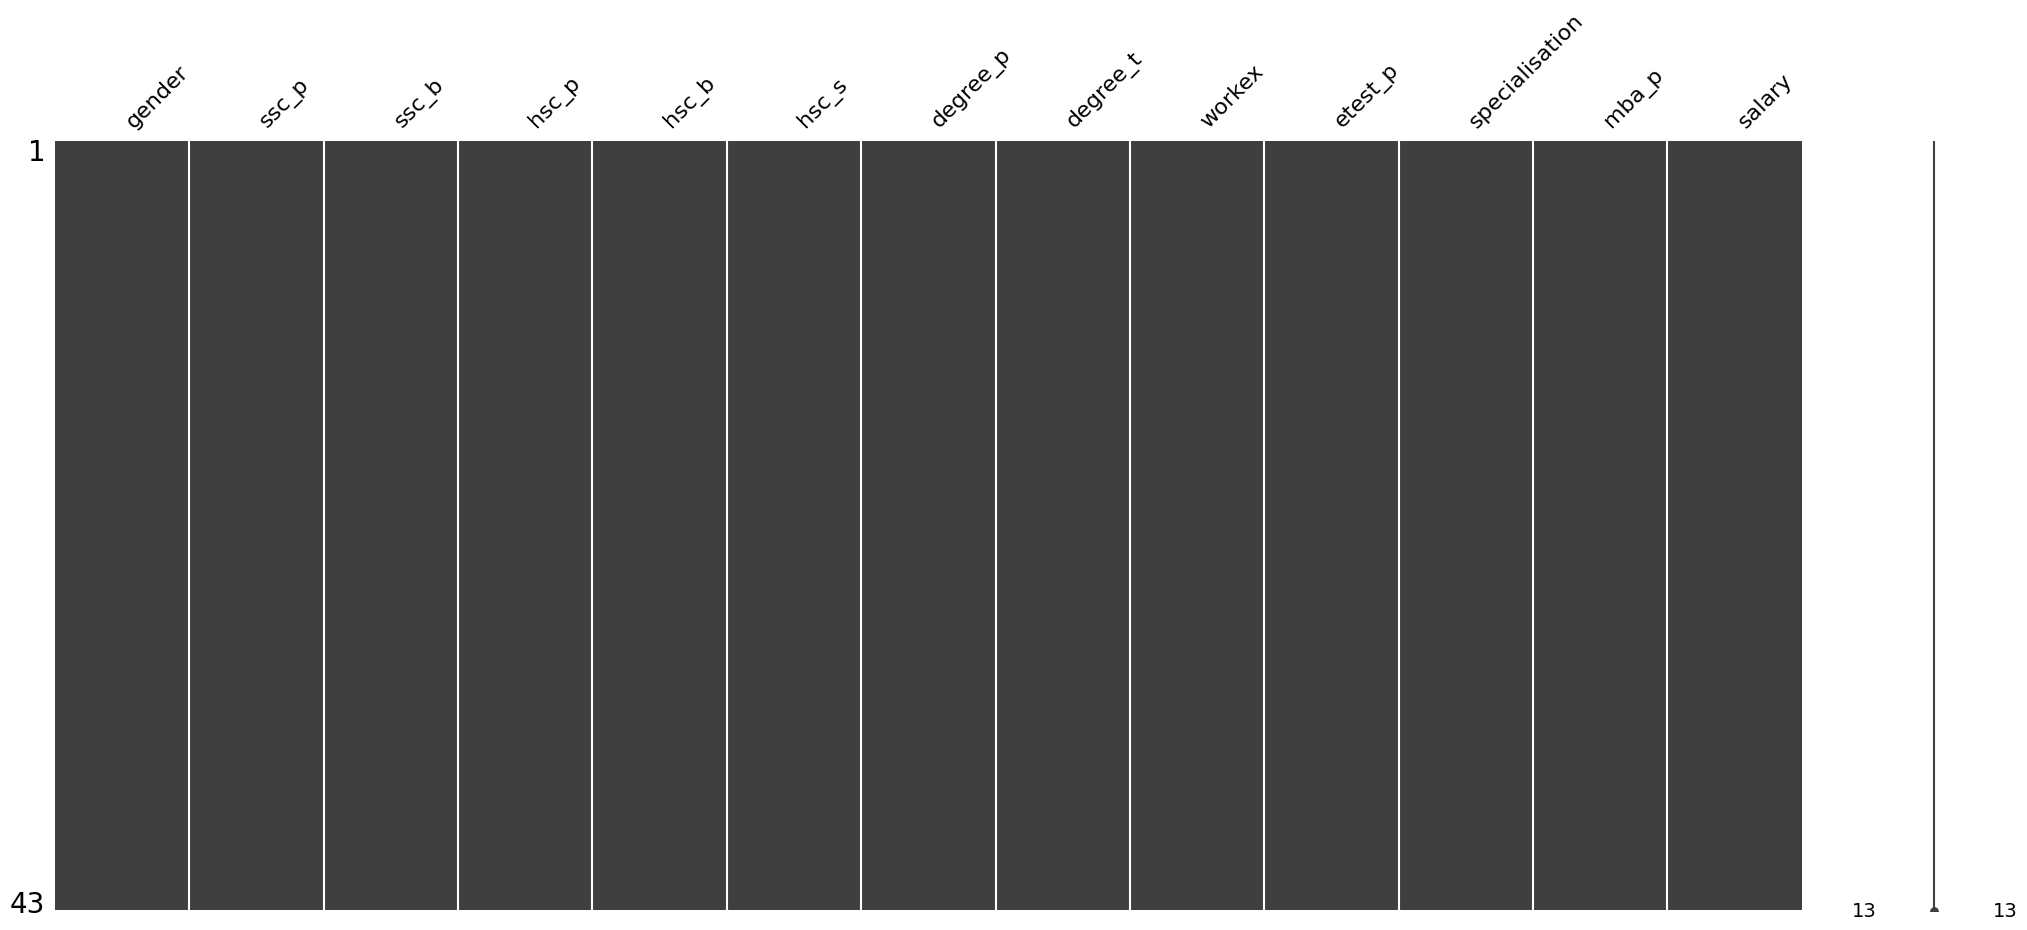

In [69]:
# Test the testing dataset after processing the null values

# Your code goes here
msno.matrix(x_test)

### Handle the categorical features

**Q:** Select an appropriate method to encode the categorical features. Explain your selection and incorporated methodology to be followed in categorical feature handling (i.e., if you are going to use some specific parameters or techniques reason about them accordingly).
> **A:**

Here I use the label encoding method to encode the categorical features. The reason for using label encoding is that it is simple and easy to implement. Also, label encoding provides a quick and convenient way to convert categorical data into a format suitable for ML algorithms.



In [70]:
# Hint: Use Scikit-Learn library for the feature encoding

# Your code goes here
from sklearn.preprocessing import LabelEncoder


# List the categorical features

# Your code goes here
categorical_features = x_train.select_dtypes(include=['object']).columns.tolist()



# Define the encoder
# Hint: https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html

# Your code goes here
Encoder=LabelEncoder()


# Encode the training features

# Your code goes here
for feature in categorical_features:
    x_train[feature]=Encoder.fit_transform(x_train[feature])



In [71]:
# Check the datatypes of the the Pandas dataframe after the transformation
x_train.dtypes

# Your code goes here

gender              int32
ssc_p             float64
ssc_b               int32
hsc_p             float64
hsc_b               int32
hsc_s               int32
degree_p          float64
degree_t            int32
workex              int32
etest_p           float64
specialisation      int32
mba_p             float64
salary            float64
dtype: object

In [72]:
# Encode the testing features
categorical_features_test = x_test.select_dtypes(include=['object']).columns.tolist()
for feature in categorical_features_test:
    x_test[feature]=Encoder.fit_transform(x_test[feature])

# Your code goes here

In [73]:
# Encode the target variable in train and test sets
y_train=Encoder.fit_transform(y_train)
y_test=Encoder.fit_transform(y_test)

# Your code goes here

In [74]:
# Print the encoded labels for the training set
x_train[categorical_features]

# Your code goes here

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation
127,0,1,1,2,0,0,1
47,1,0,0,1,0,1,0
10,1,0,0,1,0,1,1
6,0,1,1,1,0,0,0
60,1,0,0,2,0,1,0
...,...,...,...,...,...,...,...
113,0,1,1,1,0,0,0
64,1,1,1,1,0,0,0
15,0,0,0,1,0,1,0
125,0,0,0,1,0,0,0


### Scale the Numerical Features

In [75]:
# Standard Scale the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = x_train.select_dtypes(include=['float64']).columns.tolist()
x_train[numerical_features] = scaler.fit_transform(x_train[numerical_features])


In [76]:
# Display the head of the scaled training set
x_train.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
127,0,0.386490,1,-0.608030,1,2,0.311027,0,0,-1.248269,1,-0.665496,-0.492108
47,1,-0.467534,0,-0.608030,0,1,-1.315628,0,1,0.477344,0,-1.346763,-0.992532
10,1,-0.941992,0,-0.513560,0,1,-0.908964,0,1,-0.749759,1,-0.231962,-0.383320
6,0,-2.080691,1,-1.628307,1,1,1.666572,0,0,0.192042,0,-1.569723,-0.383320
60,1,0.576273,0,0.336670,0,2,0.717691,0,1,-0.903146,0,-0.870761,-0.383320


In [77]:
# Display the head of the scaled testing set
x_test[numerical_features] = scaler.transform(x_test[numerical_features])
x_test.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
78,1,1.525189,1,2.311095,1,2,-0.298969,2,0,1.093963,0,-0.485004,-0.274532
91,1,-1.511342,0,-0.891441,0,1,-2.156066,0,0,-0.366289,1,0.111326,-0.383320
110,0,0.149261,0,0.336670,0,2,0.717691,2,0,-1.117889,1,-1.302525,-0.492108
124,1,-0.087968,0,0.431141,0,2,-0.322013,1,1,-0.596371,1,-0.159412,-0.492108
70,1,1.335406,1,-0.513560,1,2,-0.637855,2,0,1.320976,0,0.582019,0.704560


From the EDA you should have observed that dataset is imbalanced. Therefore, in the following section we are going to handle the imbalance nature of the dataset using the technique calle **SMOTE (Synthetic Minority Over-sampling Technique)**. SMOTE has been included with the imbalanced-learn library.

Link to Imbalanced-Learn Library: https://imbalanced-learn.org/stable/user_guide.html#user-guide

### Handling the Imbalance Nature of the Dataset

**Q:** Explain the SMOTE algorithem. What is the basic advantage of using SMOTE over other oversampling techniques.<br>
> **A1:**
SMOTE algorithm is an over-sampling technique that use to balance the imbalance data sets. It works by creating synthetic samples from the minor class instead of creating copies. It randomly chooses one of the k-nearest-neighbors and uses it to create a similar, but randomly tweaked, new observations.

<br>
> **A2 (Advantage):**

The basic advantage of using SMOTE over other oversampling techniques is that it does not create exact copies of the minority class but creates new, synthetic, samples. This helps to overcome the overfitting problem.

In [78]:
# Oversample the training set
# Makesure to save the oversampled data to seperate variables since we will need the original data points at a later point of the
# model development
# Hint: https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

# Your code goes here
from imblearn.over_sampling import SMOTE
x_train_balanced, y_train_balanced = SMOTE().fit_resample(x_train, y_train)

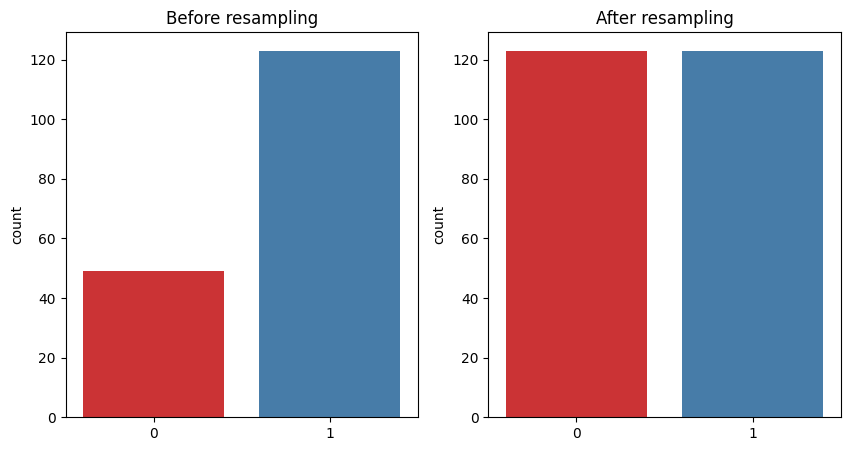

In [79]:
# plot the count plots side by side before and after resampling
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=y_train, data=data, palette='Set1')
plt.title('Before resampling')

plt.subplot(1,2,2)
sns.countplot(x=y_train_balanced, data=data, palette='Set1')
plt.title('After resampling')

plt.show()

# Your code goes here

As it can be seen from the above plot the the SMOTE has balanced the traning dataset by oversampling the minority class. <br>
**Q:** Are we going to oversample the testing set as well? Explain your point of view.
> **A:**
No, we are not going to oversample the testing set. Because the testing set is used to evaluate the performance of the model. Till the evaluation of the model the test set should be as it is. If we oversample the test set it will affect the evaluation of the model.

The above generated oversampled dataset is only for the visualization of the functionality of the SMOTE algorithm and the machine learning model development will be done by means of imbalanced-learn pipeline (Ref: https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) along with Stratified K-Folds cross-validation (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) and GridSearchCV (Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to avoid any data leackages during the training process. Proceed with the given instructions in the following section to implement a Support Vector Classifer in proper way.

## Machine Learning Model Development: Placement Prediction with Support Vector Classifier

In [80]:
# Make sure you have loaded the necessary libaries here or in a point before

# Your code goes here

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from imblearn.pipeline import Pipeline



In [81]:
# Define imbpipeline with following steps,
## SMOTE
## classifier (SVC in this case)

# Your code goes here
smote = SMOTE
svc = SVC
pipeline = Pipeline([('smote',smote),('svc',svc)])

In [82]:
# Define stratified k-fold cross validation with five folds

# Your code goes here
k_fold = KFold()

**Q:** What is the importance of Stratified K-Folds cross-validation?
> **A:**
The importance of Stratified K-Folds cross-validation is that it ensures that each fold is a good representative of the whole dataset.Also, it is used to evaluate the performance of the model and used to avoid overfitting and underfitting of the model.

In [83]:
# Define parameter grid with two to three hyper parameters to perform grid search

# Your code goes here
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000],'kernel': ['rbf', 'poly', 'sigmoid'],'degree': [1, 2, 3, 4, 5]}

In [84]:
# Define grid seach instance with GridSearchCV from Scikit-Learn

# Your code goes here
Model_SVC = SVC()
Grid_Search_SVC = GridSearchCV(Model_SVC,param_grid, refit=True, verbose=3)

In [85]:
# fit the grid search instance to the training data
# Do not use the upsampled train dataset before.
# Use the imbalanced dataset

# Your code goes here
Grid_Search_SVC.fit(x_train, y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 2/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 3/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.735 total time=   0.0s
[CV 4/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.706 total time=   0.0s
[CV 5/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.706 total time=   0.0s
[CV 1/5] END ......C=0.1, degree=1, kernel=poly;, score=0.743 total time=   0.0s
[CV 2/5] END ......C=0.1, degree=1, kernel=poly;, score=0.829 total time=   0.0s
[CV 3/5] END ......C=0.1, degree=1, kernel=poly;, score=0.853 total time=   0.0s
[CV 4/5] END ......C=0.1, degree=1, kernel=poly;, score=0.735 total time=   0.0s
[CV 5/5] END ......C=0.1, degree=1, kernel=poly;, score=0.765 total time=   0.0s
[CV 1/5] END ...C=0.1, degree=1, kernel=sigmoid;, score=0.714 total time=   0.0s
[CV 2/5] END ...C=0.1, degree=1, kernel=sigmoid

[CV 1/5] END ......C=0.1, degree=5, kernel=poly;, score=0.743 total time=   0.0s
[CV 2/5] END ......C=0.1, degree=5, kernel=poly;, score=0.714 total time=   0.0s
[CV 3/5] END ......C=0.1, degree=5, kernel=poly;, score=0.794 total time=   0.0s
[CV 4/5] END ......C=0.1, degree=5, kernel=poly;, score=0.765 total time=   0.0s
[CV 5/5] END ......C=0.1, degree=5, kernel=poly;, score=0.765 total time=   0.0s
[CV 1/5] END ...C=0.1, degree=5, kernel=sigmoid;, score=0.714 total time=   0.0s
[CV 2/5] END ...C=0.1, degree=5, kernel=sigmoid;, score=0.714 total time=   0.0s
[CV 3/5] END ...C=0.1, degree=5, kernel=sigmoid;, score=0.735 total time=   0.0s
[CV 4/5] END ...C=0.1, degree=5, kernel=sigmoid;, score=0.706 total time=   0.0s
[CV 5/5] END ...C=0.1, degree=5, kernel=sigmoid;, score=0.706 total time=   0.0s
[CV 1/5] END .........C=1, degree=1, kernel=rbf;, score=0.829 total time=   0.0s
[CV 2/5] END .........C=1, degree=1, kernel=rbf;, score=0.886 total time=   0.0s
[CV 3/5] END .........C=1, d

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'degree': [1, 2, 3, 4, 5],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=3)

Hint: Refer to the GridSearchCV documentation in Scikit-Learn site to answer the following questions.

In [86]:
# Print the mean cross validated score of the best estimator (Accuracy)

# Your code goes here
from sklearn.model_selection import cross_val_score
cross_val_score(Grid_Search_SVC.best_estimator_,x_train, y_train, cv=k_fold, scoring='accuracy').mean()

0.8724369747899161

In [87]:
# Print the best hyper parameters detected from the grid search

# Your code goes here
print(Grid_Search_SVC.best_params_)

{'C': 1, 'degree': 1, 'kernel': 'rbf'}


In [88]:
# Obtain the best estimator selected from the grid search

# Your code goes here
print(Grid_Search_SVC.best_estimator_)

SVC(C=1, degree=1)


### Model Evaluation

In [89]:
# Fit the best estimator to the whole training dataset

# Your code goes here
best_fit = Grid_Search_SVC.best_estimator_.fit(x_train, y_train)

In [90]:
# Calculate the accuracy considering the complete traing set

# Your code goes here
y_train_pred = best_fit.predict(x_train)
training_score = accuracy_score(y_train, y_train_pred)
print(training_score)

0.9418604651162791


In [91]:
# Calculate the accuracy for the test set

# Your code goes here
y_test_pred = best_fit.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(test_accuracy)

0.7441860465116279


**Q:** Comment on the accuracies obtained above. Do you think this model is overfitting or not? <br>
> **A:**

Here the accuracy of the training set if 0.941 and the testing set is 0.744. The accuracy of the training set is higher than the accuracy of the testing set. It is near to 0.2. Therefore we can say that the model is overfitting.

In [92]:
confusion_matrix(y_train, y_train_pred)

array([[ 40,   9],
       [  1, 122]], dtype=int64)

In [93]:
confusion_matrix(y_test, y_test_pred)

array([[ 8, 10],
       [ 1, 24]], dtype=int64)

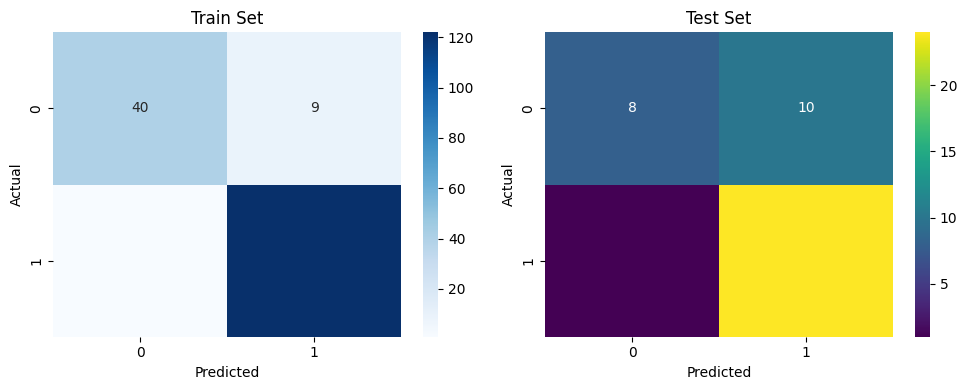

In [94]:
# Generate the confusion matrix for the train and test sets and plot them in the same figure side by side

# Your code goes here

conf_matrix_test = confusion_matrix(y_test, y_test_pred)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.heatmap(conf_matrix_train, annot=True, cmap="Blues")
plt.title("Train Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1,2,2)
sns.heatmap(conf_matrix_test, annot=True, cmap='viridis')
plt.title("Test Set")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

**Q:** Comment about the obtained confusion matrices. <br>
> **A:**

Confusion matrix for the training set:
Here we can see TP=40 , FP=9 ,FN=1, FP=122 . The number of false positives and false negatives are less. Therefore we can say that the model is good at predicting the placement of the students for the train data set.

confusion matrix for the testing set:
Here we can see TP=8 , TN=10 ,FN=1 ,FP=24. The number of false positive is higher than the number of false negatives. But number of true negatives is higher than the number of true positives. Therefore we can say that the model is not good at predicting the placement of the students for the test data set.

In [95]:
# Generate the classification report from Scikit-Learn for the test set

# Your code goes here
from sklearn.metrics import classification_report
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.44      0.59        18
           1       0.71      0.96      0.81        25

    accuracy                           0.74        43
   macro avg       0.80      0.70      0.70        43
weighted avg       0.78      0.74      0.72        43



**Q:** Comment on the results obtained with classfication report. Explain the different parameters you can observe in the report.
> **A:**

Here we can see the presicion accuracy of the not placed students is 0.89 and the placed student is 0.71. For the recall the Not placed accuracy is 0.44 and placed accuracy is 0.96. For the f1-score the not placed score is 0.59 and the placed score is 0.81. The number of instances belonging to the "Not Placed" class 18 in the other hand the number of instances belonging to the "Not Placed" class is 25. Among these parameters precision is the best parameter because it has high accuracy for both placed and not placed students when compared to the other parameters.


0.7022222222222222


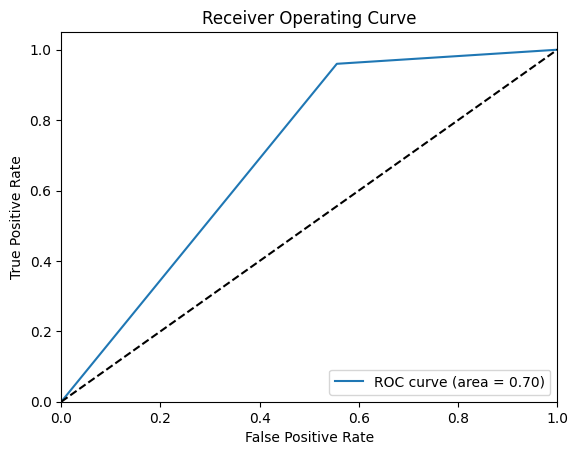

0.7022222222222222


In [96]:
# Generate the ROC (Receiver Operating Curve) for the estimator considering the test data
# Also print the Area Under Curve (AUC) value asscoiated with ROC curve

# Your code goes here
from sklearn.metrics import roc_curve, roc_auc_score
ROC =   roc_auc_score(y_test, y_test_pred)
print(ROC)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % ROC)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Curve')
plt.legend(loc="lower right")
plt.show()

Area_Under_Curve = roc_auc_score(y_test, y_test_pred)
print(Area_Under_Curve)




**Q:** What is ROC curve and AUC value? Furthermore comment on the obtained ROC curve and AUC value. What can you tell on the estmator based on the obtained ROC curve and AUC value?
> **A:**
Area under the curve (AUC) is the area under the ROC curve. The ROC curve is a graphical representation of the contrast between true positive rates and the false positive rate at various thresholds. The AUC value is 0.70. The AUC value is between 0.5 and 1. Therefore we can say that the model is good at predicting the placement of the students.